In [24]:
import matplotlib.pyplot as plt, seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, GRU, LSTM, Input, Dropout

In [26]:
# Load the dataset
df = pd.read_csv('Final-50-stocks.csv')
df

,DATE,TATASTEEL,WIPRO,TITAN,ULTRACEMO,TECHM,RELIANCE,SHREECEM,SUNPHARMA,TATAMOTORS,...,BPCL,BRITANNIA,ADANIPORTS,BAJAJFINSERV,BAJAJFINANCE,BHARTIARTL,AXISBANK,BAJAJ-AUTO,ASIANPAINT,UPL
0,2010-01-11,591.90,423.70,3792.50,6737.95,735.60,1093.20,2116.10,2190.70,1170.60,...,754.80,413.15,NaN,467.25,798.60,335.30,1513.60,1530.75,2705.05,NaN
1,2010-01-12,613.55,414.70,3781.90,5443.70,671.15,988.80,2094.10,448.65,1286.75,...,697.95,410.30,NaN,481.65,713.30,350.55,1424.45,1571.20,2680.40,NaN
2,2010-02-11,599.05,433.85,3818.70,6735.25,724.55,1074.85,2164.55,2190.45,1154.25,...,772.75,413.60,NaN,472.10,806.40,329.25,1526.60,1548.75,2792.80,NaN
3,2010-02-12,622.75,426.05,3784.20,5368.40,676.35,1011.15,2022.35,452.90,1320.15,...,685.80,412.45,NaN,484.35,741.85,346.10,1455.35,1574.30,2651.85,NaN
4,2010-03-11,609.60,434.70,3833.05,6858.65,732.50,1065.30,2261.40,2249.30,1185.55,...,765.60,415.75,NaN,480.15,799.25,328.40,1536.10,1582.35,2694.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706,2021-10-05,1216.35,525.95,1455.15,6403.10,990.50,1926.20,27309.95,698.20,314.85,...,453.70,3413.80,765.45,11332.00,5497.50,572.55,715.25,3868.65,2556.95,674.60
2707,2021-10-06,1114.45,554.25,1738.65,6709.65,1064.90,2183.00,28225.80,676.05,344.75,...,483.55,3576.30,846.75,11993.10,6086.40,545.15,744.25,4179.90,2950.60,838.70
2708,2021-10-08,1373.60,603.85,1799.20,7474.15,1323.05,2088.05,27117.65,793.35,294.20,...,444.70,3637.20,693.00,14036.50,6170.10,622.20,761.55,3797.95,2977.15,771.10
2709,2021-10-13,1354.30,672.60,2537.20,7350.40,1402.15,2694.95,27815.70,842.55,506.90,...,458.65,3883.70,759.00,18188.25,7929.30,689.90,794.60,3967.65,3323.50,747.45


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATE          2711 non-null   object 
 1   TATASTEEL     2711 non-null   float64
 2   WIPRO         2711 non-null   float64
 3   TITAN         2711 non-null   float64
 4   ULTRACEMO     2711 non-null   float64
 5   TECHM         2711 non-null   float64
 6   RELIANCE      2711 non-null   float64
 7   SHREECEM      2711 non-null   float64
 8   SUNPHARMA     2711 non-null   float64
 9   TATAMOTORS    2711 non-null   float64
 10  TCS           2711 non-null   float64
 11  SBIN          2711 non-null   float64
 12  NESTLEIND     2711 non-null   float64
 13  NTPC          2711 non-null   float64
 14  M&M           2711 non-null   float64
 15  MARUTI        2711 non-null   float64
 16  ONGC          2711 non-null   float64
 17  POWERGRID     2711 non-null   float64
 18  JSWSTEEL      2711 non-null 

In [28]:
df = df.dropna(axis=1)

train = df.iloc[:2500,:]
test = df.iloc[2500:,:]

In [29]:
def seq_gen(comp, df, seq_len):
    
    scaler = MinMaxScaler()
    df[comp] = scaler.fit_transform(df[[comp]])
    company = df[comp].values

    data = []
    target = []
    a = 0
    b = seq_len
    while b != len(company):
        data.append(np.array(company[a:b]))
        target.append(company[b])
        a += 1
        b += 1

    data = np.array(data)
    data = data.reshape(-1,seq_len,1)
    target = np.array(target)
    target = target.reshape(-1,1)
    return [data,target]

In [30]:
comp = 'RELIANCE'
X_train, y_train = seq_gen(comp, train,50)
X_test, y_test = seq_gen(comp, test,50)

/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_17675/1424869538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[comp] = scaler.fit_transform(df[[comp]])
/var/folders/qh/215l544s06x3_jp987f9gdgh0000gn/T/ipykernel_17675/1424869538.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[comp] = scaler.fit_transform(df[[comp]])


In [31]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2450, 50, 1), (2450, 1), (161, 50, 1), (161, 1))

In [33]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (50, 1)))
model.add(Dropout(0.2))             

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_3 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 50)            20200     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [34]:
model.compile(loss="mean_squared_error", optimizer='sgd', metrics=["mean_absolute_error"])

In [36]:
earlyStopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.05,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
model.fit(x=X_train, y=y_train, batch_size=32, epochs=100,
          validation_data=(X_test,y_test), callbacks=[earlyStopping])

Epoch 1/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0076 - mean_absolute_error: 0.0538 - val_loss: 0.0108 - val_mean_absolute_error: 0.0790
Epoch 2/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0079 - mean_absolute_error: 0.0547 - val_loss: 0.0111 - val_mean_absolute_error: 0.0788
Epoch 3/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0077 - mean_absolute_error: 0.0542 - val_loss: 0.0108 - val_mean_absolute_error: 0.0790
Epoch 4/100
77/77 [==============================] - 2s 22ms/step - loss: 0.0079 - mean_absolute_error: 0.0547 - val_loss: 0.0109 - val_mean_absolute_error: 0.0788
Epoch 5/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0077 - mean_absolute_error: 0.0543 - val_loss: 0.0112 - val_mean_absolute_error: 0.0788
Epoch 6/100
77/77 [==============================] - 2s 21ms/step - loss: 0.0075 - mean_absolute_error: 0.0533 - val_loss: 0.0110 - val_mean_absolute_error: 0.0788
Epoch 7/100
77/7

77/77 [==============================] - 1s 5ms/step


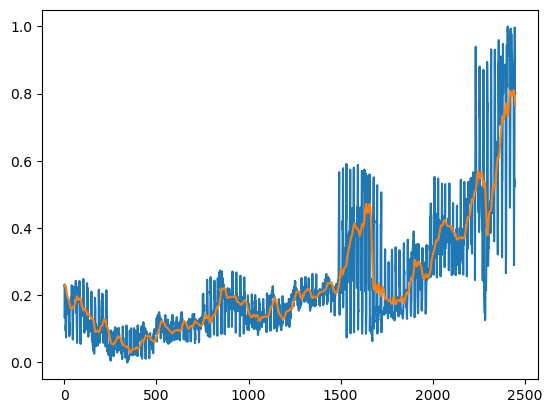

In [37]:
train_predict = model.predict(X_train)
plt.plot(y_train)
plt.plot(train_predict)
plt.show()

6/6 [==============================] - 0s 5ms/step


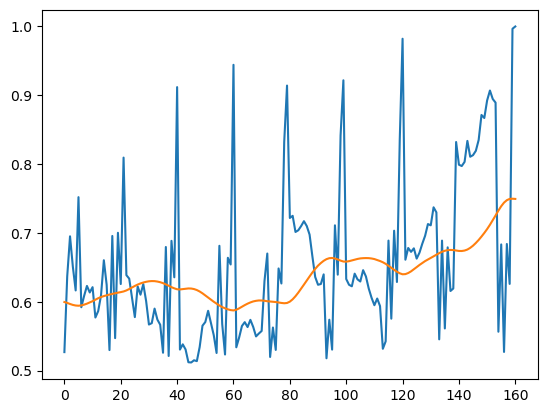

In [38]:
test_predict = model.predict(X_test)
plt.plot(y_test)
plt.plot(test_predict)
plt.show()

In [39]:
future_predict = y_test[-50:]
start_index = 0
no_days = 30
while len(future_predict) < 50 + no_days:
    future = model.predict(future_predict[start_index:].reshape(-1,50,1))
    future_predict = np.append(future_predict, future, axis=0)
    start_index += 1

future_predict = future_predict[-no_days:]

1/1 [==============================] - 0s 9ms/step


In [40]:
future_predict

array([[0.74954879],
       [0.74999458],
       [0.75058877],
       [0.75119895],
       [0.75166935],
       [0.7518611 ],
       [0.75192356],
       [0.75170016],
       [0.75134039],
       [0.75068945],
       [0.7498253 ],
       [0.74906951],
       [0.74821305],
       [0.74729306],
       [0.74632138],
       [0.74532634],
       [0.74430531],
       [0.7432664 ],
       [0.74221909],
       [0.74116719],
       [0.74012661],
       [0.73908347],
       [0.73806113],
       [0.73716426],
       [0.7361868 ],
       [0.73529983],
       [0.73435163],
       [0.73345655],
       [0.73257142],
       [0.73157638]])

6/6 [==============================] - 0s 6ms/step


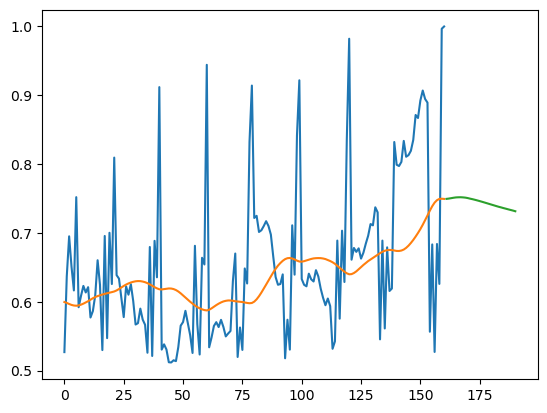

In [41]:
test_predict = model.predict(X_test)
plt.plot(y_test)
plt.plot(test_predict)
plt.plot(range(len(y_test), len(y_test)+no_days), future_predict)
plt.show()

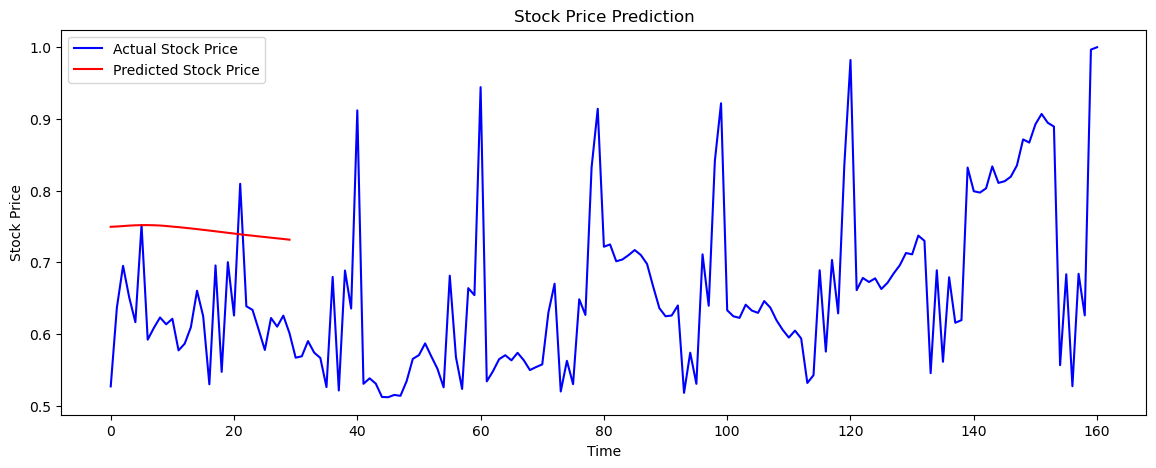

In [43]:
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual Stock Price')
plt.plot(future_predict, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
